In [ ]:
import os, cv2, keras, json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#IMAGE_PATH = "Week3/data/Images"
#ANNOTATION_PATH = "Week3/data/Airplanes_Annotations"

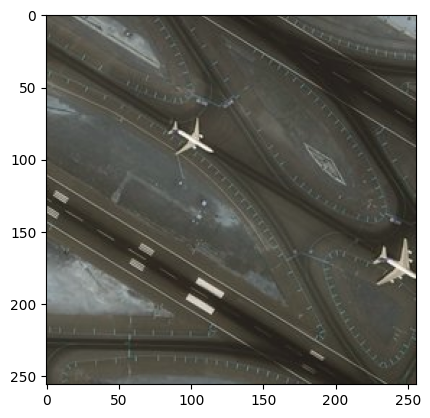

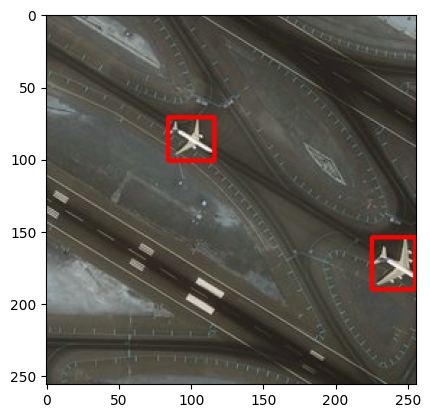

In [ ]:
filename = "42847.jpg"
img = cv2.imread("/content/42847.jpg")
df = pd.read_csv("/content/42847.csv")
plt.imshow(img)
for row in df.iterrows():
    x1 = int(row[1][0].split(" ")[0])
    y1 = int(row[1][0].split(" ")[1])
    x2 = int(row[1][0].split(" ")[2])
    y2 = int(row[1][0].split(" ")[3])
    cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
plt.figure()
plt.imshow(img)


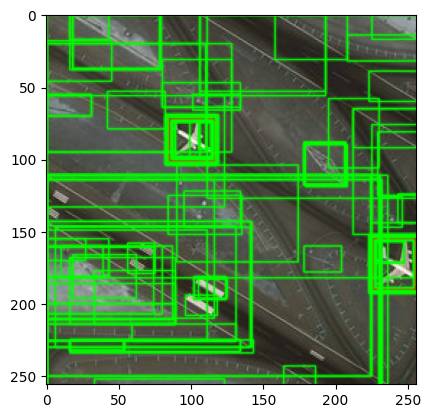

In [ ]:
filename = "/content/42847.jpg"
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
rects = ss.process()
img_out = img.copy()
max_x = 0
for i, rect in (enumerate(rects)):
    if i < 100:
        x,y,w,h = rect
        cv2.rectangle(img_out, (x,y), (x+w, y+h), (0,255,0), 1, cv2.LINE_AA)
plt.imshow(img_out)

In [ ]:
with open("Comp_Vision_Task_3_model.json") as f:
    config = json.load(f)
config = json.dumps(config)
loaded_model = tf.keras.models.model_from_json(config)
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/ieeercnn_vgg16_1.h5")

In [ ]:
array = []
a = [1,2,3,4]
array.append(a)
array

[[1, 2, 3, 4]]

1/1 [==============================] - 1s 879ms/step


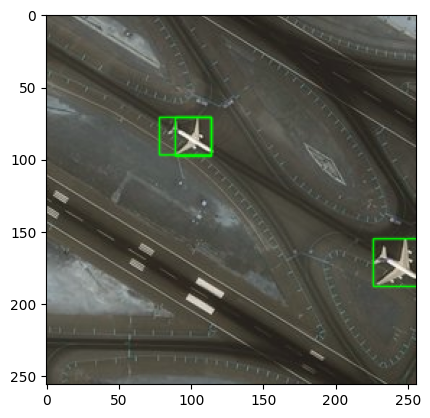

In [ ]:
filename = "/content/42847g.jpg"
img = cv2.imread(filename)
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
out_prob =[]
out_coordinat = []
count = 0
for e,result in enumerate(ssresults):
    if e < 10000:
        x,y,w,h = result
        timage = imout[y: y + h,x: x + w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis = 0)
        out= loaded_model.predict(img)
        if out[0][0] > 0.65:
            count = count + 1
            # de xem cai probavility nao lon nhat va nho nhat
            out_prob.append(out[0][0])
            # cos the luu la [x,y,w,h] luon de de tinh dap an hon
            out_coordinat.append([x,y,x+w,y+h])
            cv2.rectangle(imout, (x, y), (x + w, y + h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

In [ ]:
out_prob

[0.80544984, 0.7603695, 0.8249733]

In [ ]:
out_coordinat

[[226, 155, 256, 188], [89, 71, 114, 98], [78, 71, 114, 97]]